Project: Introduction to classification algorithms

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [14]:
#sample dataset generation
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.3)

Size of dataset

In [15]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1000, 2)
y shape: (1000,)


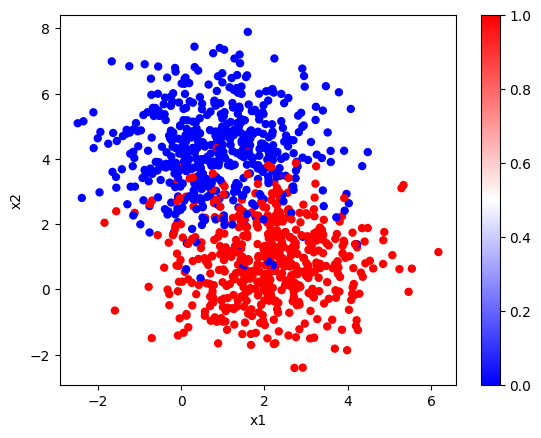

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


Simple classification algorithm

2- Decision tree with Scikit-Learn:

In [17]:
from sklearn.tree import DecisionTreeClassifier

# decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)

In [18]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
inst = np.array([4,0])
inst = inst.reshape(1,-1)
y_pred = tree.predict(inst) # prediction
print(y_pred) # print the prediction


[1]


In [20]:
np.random.seed(3) # seed
n = 3
idxs = np.random.randint(X.shape[0], size=3)
inst_t = X[idxs,:]
y_pred = tree.predict(inst_t)


Decision boundaries

In [21]:
def visualize_classifier(model, X, y, ax=None, cmap='bwr'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    #ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)


Accuracy Scores

In [22]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X)
accuracy_score(y_pred,y)


0.905

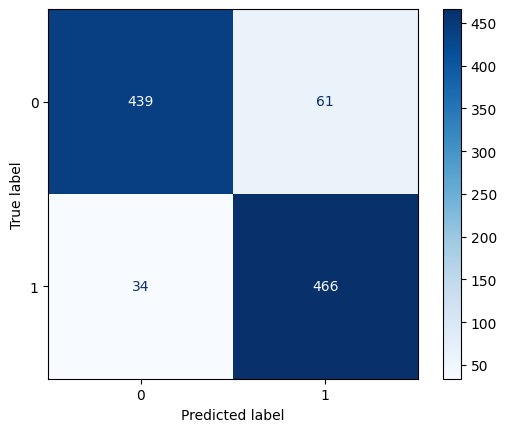

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap = plt.get_cmap('Blues'))


**Quiz and their answers:**

1.Which of the following statements are True about classification?


The target variable is the variable whose values are modeled and predicted by other variables.


Classification is a supervised task.


A single row of data is called an instance.




2.Which of the following statements are examples of classification?


Determine when a heater is on or off based on temperature data.


Predict when an images belong to a class such as recurrent cancer or no cancer.

3.Training and testing phase

In which phase are model parameters adjusted?

Training phase
